# Adicionando Sazonalidades Condicionais

A diferente o comportamento dos dias úteis com relação ao comportamento dos dias não úteis, cada momento tem um comportamento próprio. Lembrando que a divvy bikes é uma empresa de alugueis de bikes, então todo o fluxo que movimenta as corridas é muito diferente dos dias da semana, dos finais de semana, onde não há nínguem trabalhando. Onde na maioria dos casos se utilizariam as bicicletas mais para passeios. 

Desse modo, não faz sentido utilizar uma mesma sazonalidade para os dias da semana e aos finais de semana. 

Pois há um comportamento humano totalmente diferente. Para representar essa situação de uma forma mais fidedigna no nosso modelo, nós vamos configurar essa condição. 



### Precisamos criar colunas booleanas para especificar quando o prophet deve ou não usar uma sazonalidade. Vamos começar carregando os nossos dados divvy_hourly

In [44]:
import pandas as pd


df= pd.read_csv('divvy_hourly.csv')
display(df.head(4))
df['date'] = pd.to_datetime(df['date'])
df.columns =['ds','y']
df

,date,rides
0,1/1/2014 1:00,1
1,1/1/2014 2:00,9
2,1/1/2014 3:00,4
3,1/1/2014 4:00,1


,ds,y
0,2014-01-01 01:00:00,1
1,2014-01-01 02:00:00,9
2,2014-01-01 03:00:00,4
3,2014-01-01 04:00:00,1
4,2014-01-01 07:00:00,2
...,...,...
34711,2017-12-31 20:00:00,10
34712,2017-12-31 21:00:00,9
34713,2017-12-31 22:00:00,3
34714,2017-12-31 23:00:00,8


In [45]:


# função, verificar se o dia da semana é 5 ou 6, sábado ou domingo

def is_weekend(ds):
    date= pd.to_datetime(ds)
    return (date.dayofweek ==5 or date.dayofweek ==6)

In [46]:
# criar dois campos novos no dataframe

In [47]:

#final de semana, retorno é true
df['weekend'] = df['ds'].apply(is_weekend)
# dia útil, retorno False
df['weekday'] = ~df['ds'].apply(is_weekend)

df.head(50)

,ds,y,weekend,weekday
0,2014-01-01 01:00:00,1,False,True
1,2014-01-01 02:00:00,9,False,True
2,2014-01-01 03:00:00,4,False,True
3,2014-01-01 04:00:00,1,False,True
4,2014-01-01 07:00:00,2,False,True
5,2014-01-01 08:00:00,7,False,True
6,2014-01-01 09:00:00,2,False,True
7,2014-01-01 10:00:00,4,False,True
8,2014-01-01 11:00:00,7,False,True
9,2014-01-01 12:00:00,9,False,True


In [48]:
from prophet import Prophet


In [49]:

# vamos definir a sazonalidade

model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality =6,
                weekly_seasonality =6, 
                daily_seasonality=False) #no caso vamos desligar a sazonalidade diária.
# foi usado 6, pois se comportou bem

# agora, iremos adicionar a sazonalidade condicional. Assim, vamos usar o comando add_seasonality

In [50]:
#período de 1 dia, ordem de fourier 3 e a sazonalidade de forma condicional. 
# no condition_name é o campo booleano que determina se nós devemos utilizar uma sazonalidade ou outra
#final de semana
model.add_seasonality(name='daily_weekend', period=1, fourier_order = 3, condition_name ='weekend')
# dias úteis
model.add_seasonality(name='daily_weekday', period=1, fourier_order = 3, condition_name ='weekday')

In [51]:
#vamos prever

model.fit(df)
#especificar a frequência, quando não são dados diários
future = model.make_future_dataframe(periods= 365 *24, freq='h')
future['weekend']= future['ds'].apply(is_weekend)
future['weekday']= ~future['ds'].apply(is_weekend)
display(future)

16:15:16 - cmdstanpy - INFO - Chain [1] start processing
16:15:33 - cmdstanpy - INFO - Chain [1] done processing


,ds,weekend,weekday
0,2014-01-01 01:00:00,False,True
1,2014-01-01 02:00:00,False,True
2,2014-01-01 03:00:00,False,True
3,2014-01-01 04:00:00,False,True
4,2014-01-01 07:00:00,False,True
...,...,...,...
43471,2018-12-31 20:00:00,False,True
43472,2018-12-31 21:00:00,False,True
43473,2018-12-31 22:00:00,False,True
43474,2018-12-31 23:00:00,False,True


In [52]:

forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily_weekday,daily_weekday_lower,daily_weekday_upper,daily_weekend,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01 01:00:00,6.313590,-202.024732,197.798738,6.313590,6.313590,-1.038332,-1.038332,-1.038332,0.0,...,0.170219,0.170219,0.170219,-0.535951,-0.535951,-0.535951,0.0,0.0,0.0,-2.551098
1,2014-01-01 02:00:00,6.358568,-207.253874,194.569754,6.358568,6.358568,-1.223626,-1.223626,-1.223626,0.0,...,0.167956,0.167956,0.167956,-0.535639,-0.535639,-0.535639,0.0,0.0,0.0,-3.759883
2,2014-01-01 03:00:00,6.403545,-213.495861,197.947159,6.403545,6.403545,-1.375327,-1.375327,-1.375327,0.0,...,0.165886,0.165886,0.165886,-0.535325,-0.535325,-0.535325,0.0,0.0,0.0,-4.769141
3,2014-01-01 04:00:00,6.448523,-209.044711,198.947018,6.448523,6.448523,-1.311961,-1.311961,-1.311961,0.0,...,0.163905,0.163905,0.163905,-0.535008,-0.535008,-0.535008,0.0,0.0,0.0,-4.404757
4,2014-01-01 07:00:00,6.583455,-195.871025,218.545694,6.583455,6.583455,0.506249,0.506249,0.506249,0.0,...,0.157406,0.157406,0.157406,-0.534041,-0.534041,-0.534041,0.0,0.0,0.0,7.436764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43471,2018-12-31 20:00:00,362.097529,-921.187335,1680.585398,-940.869446,1679.901740,0.436309,0.436309,0.436309,0.0,...,0.086924,0.086924,0.086924,-0.539198,-0.539198,-0.539198,0.0,0.0,0.0,356.316672
43472,2018-12-31 21:00:00,362.097955,-353.122271,565.403144,-941.143965,1680.139478,-0.251310,-0.251310,-0.251310,0.0,...,0.090930,0.090930,0.090930,-0.538917,-0.538917,-0.538917,0.0,0.0,0.0,108.884066
43473,2018-12-31 22:00:00,362.098381,-317.802293,216.480336,-941.418484,1680.377216,-0.679990,-0.679990,-0.679990,0.0,...,0.096894,0.096894,0.096894,-0.538632,-0.538632,-0.538632,0.0,0.0,0.0,-44.077652
43474,2018-12-31 23:00:00,362.098808,-550.889346,314.787451,-941.693003,1680.614954,-0.858563,-0.858563,-0.858563,0.0,...,0.104614,0.104614,0.104614,-0.538345,-0.538345,-0.538345,0.0,0.0,0.0,-105.839473



# Vamos visualizar as nossas sazonalidade

Verificamos que o comportamento da sazonalidade é bem diferente. Assim, através dessa sazonalidade condicional, nós conseguimos eniquecer nosso modelo com uma interpretação mais fidedigna da realidade. 

#### O Prophet vai conseguir visualizar de uma forma mais precisa, sem influência dos finais de semana, prever os dias úteis, e ao mesmo tempo ele vai prever os finais de semana sem a influência do comportamento dos dias úteis. 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


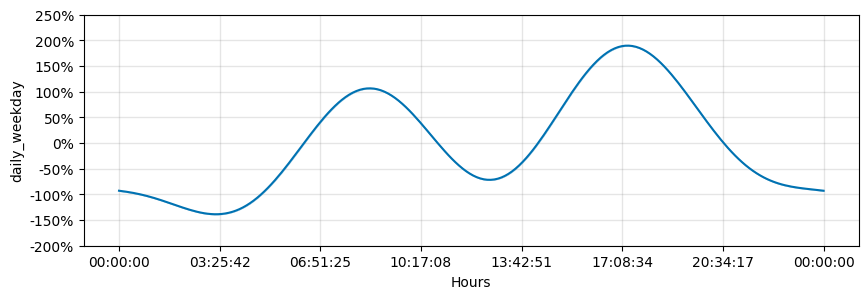

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


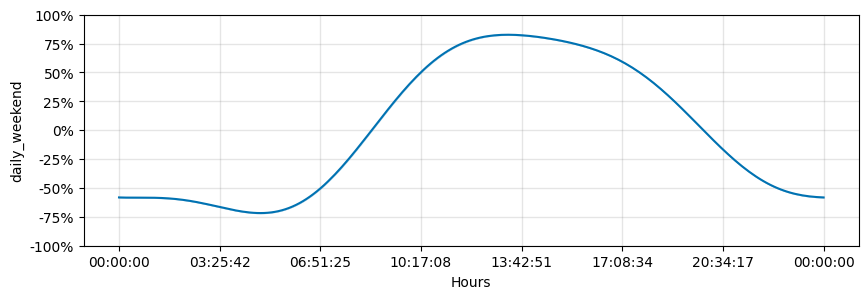

In [53]:
from prophet.plot import plot_seasonality
import matplotlib.pyplot as plt


fig3 = plot_seasonality(model, 'daily_weekday', figsize=(10,3))
plt.show()


fig4 = plot_seasonality(model, 'daily_weekend', figsize=(10,3))
plt.show()



/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetim

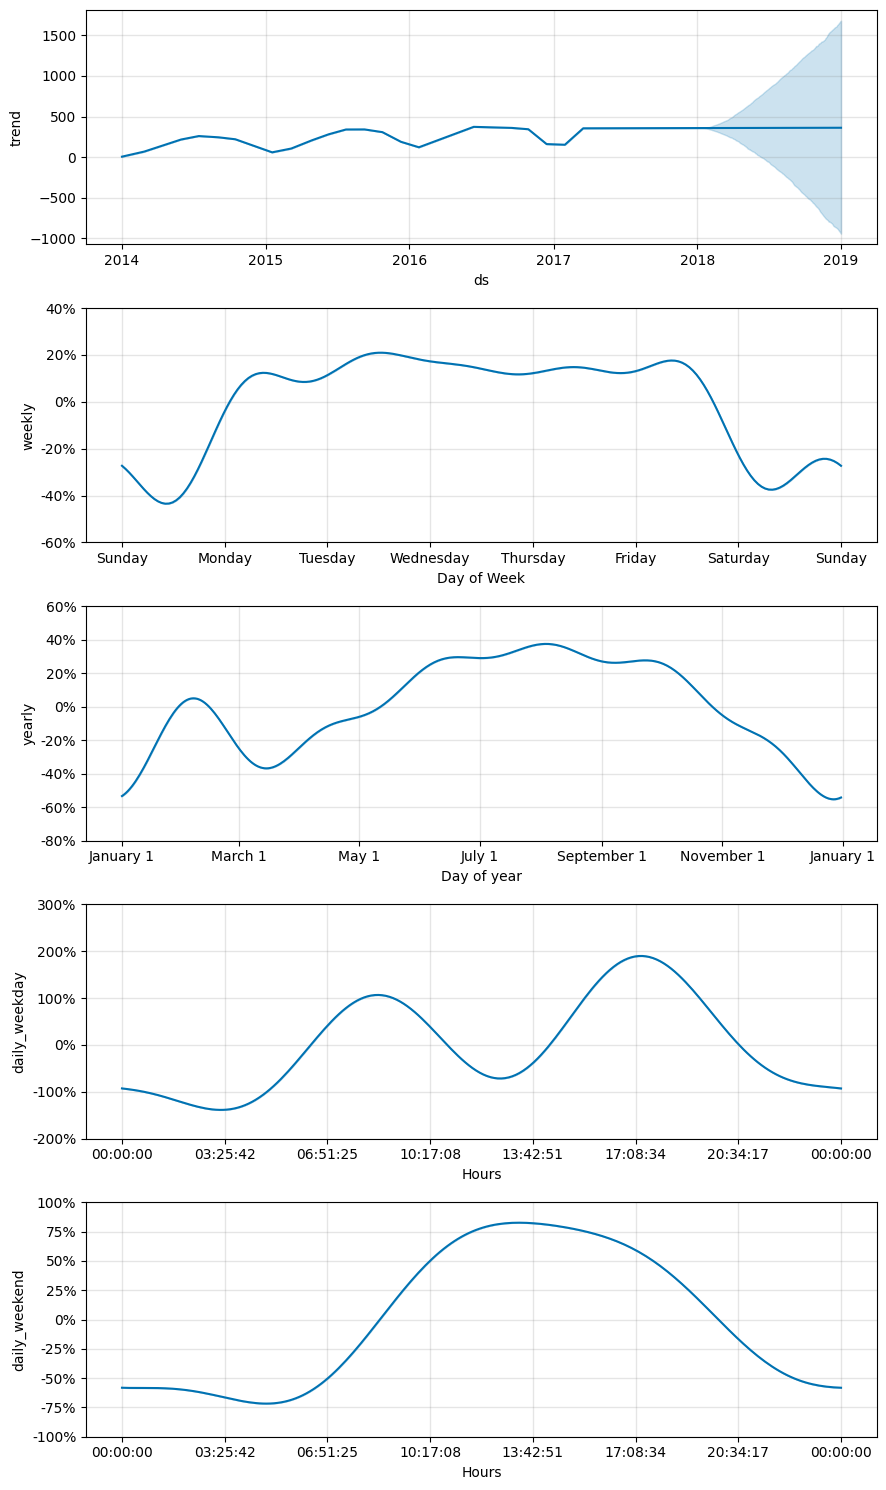

In [55]:
fig2 = model.plot_components(forecast)
fig2.show()